# 5.0 Crossvalidation in time series

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

## Time series

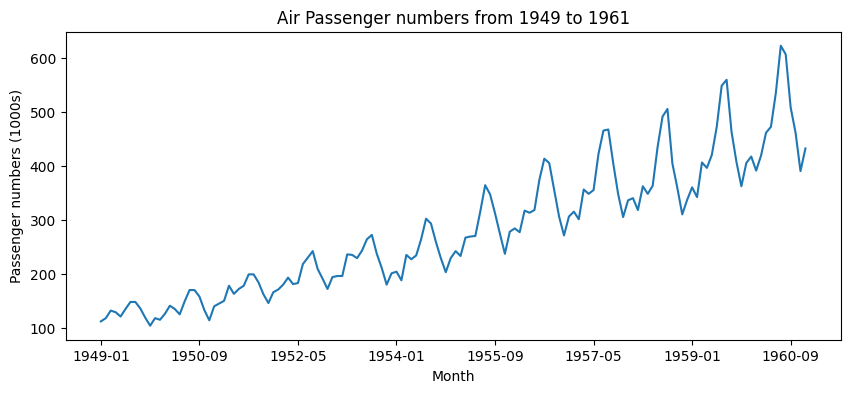

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[0,1], engine='python', skipfooter=3)
datasetO.plot(0,1,figsize=(10,4))
plt.ylabel('Passenger numbers (1000s)')
plt.title('Air Passenger numbers from 1949 to 1961')
plt.legend().remove()
plt.show()

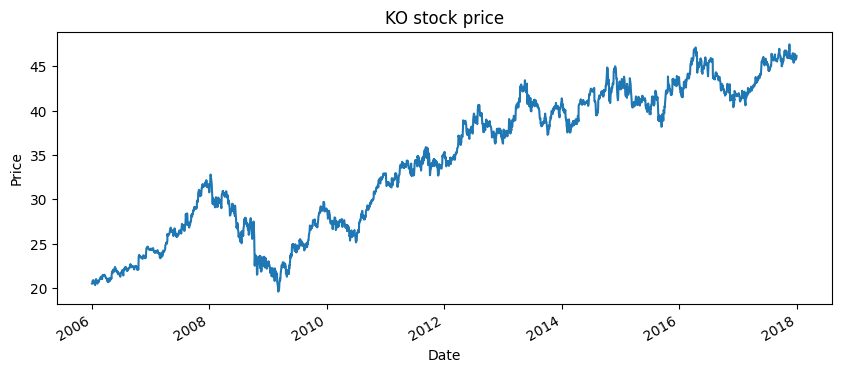

In [7]:
dataset1 = pd.read_csv('local/data/KO_2006-01-01_to_2018-01-01.csv', usecols=['Date','High'], parse_dates=['Date'])
dataset1.plot('Date','High',figsize=(10,4))
plt.ylabel('Price')
plt.title('KO stock price')
plt.legend().remove()
plt.show()

### Classical time series analysis tools

- Autocorrelation and partial autocorrelation
- Stationary, seasonality and unit root tests
- Differentiation, power transforms, etc. 

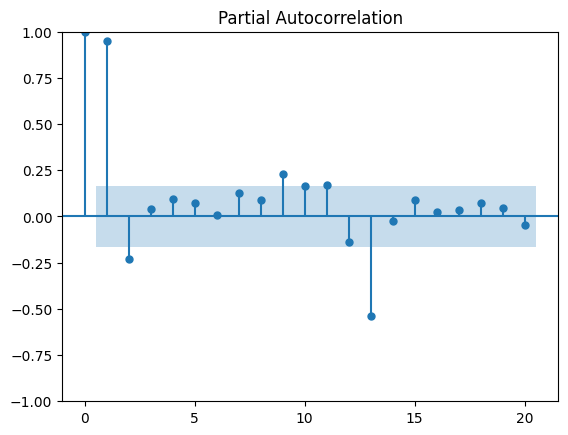

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plot_pacf(datasetO, lags=20)
plt.show()

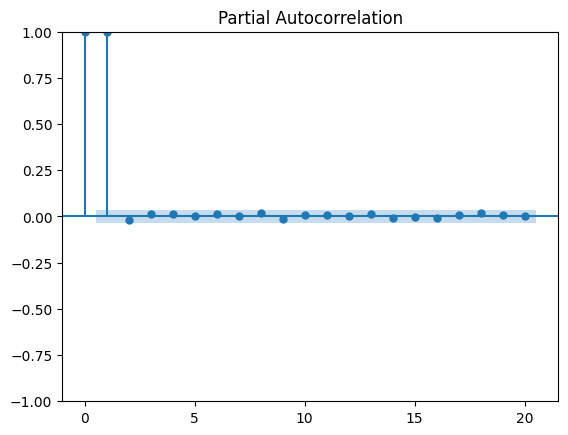

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
dataset1 = pd.read_csv('local/data/KO_2006-01-01_to_2018-01-01.csv', usecols=['High'])
dataset1[np.isnan(dataset1)] = dataset1['High'].max()
plot_pacf(dataset1, lags=20)
plt.show()

### How to split data for validation purposes?

Traditional approach:

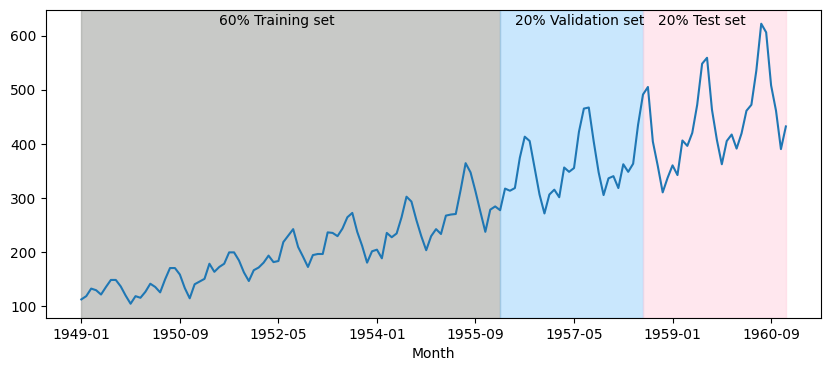

In [17]:
from local.lib import DataPreparationRNN 
datasetO = pd.read_csv('local/data/international-airline-passengers.csv', usecols=[0,1], engine='python', skipfooter=3)
DataPreparationRNN.PlotValidationTimeSeries(datasetO)

Crossvalidation in timeseries:

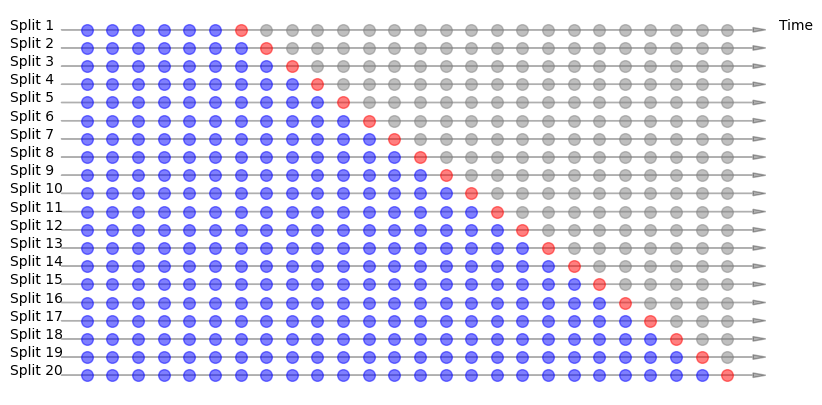

In [18]:
DataPreparationRNN.PlotCrossvalidationTS()

Including a gap between training and validation sets:

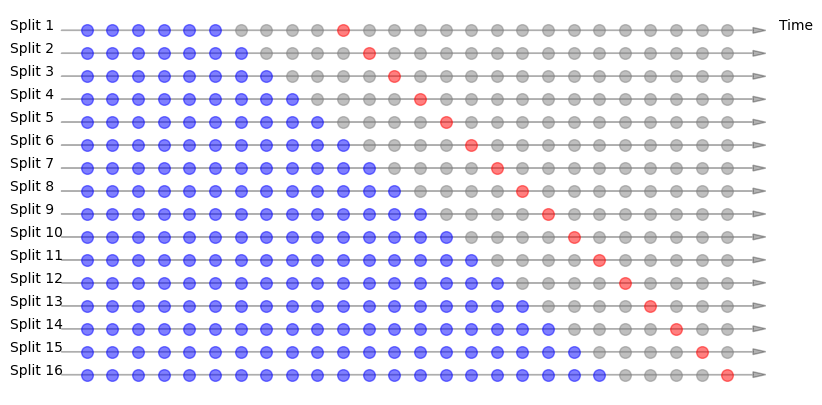

In [19]:
DataPreparationRNN.PlotCrossvalidationTS_Gap()

This can be done using the class TimeSeriesSplit:

In [20]:
from sklearn.model_selection import TimeSeriesSplit
X = np.arange(20)
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19]


Limiting the number of lacks

In [21]:
X = np.arange(20)
tscv = TimeSeriesSplit(max_train_size=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 9 10 11 12 13] TEST: [14 15 16]
TRAIN: [12 13 14 15 16] TEST: [17 18 19]


### References

C. Bergmeir, R. J. Hyndman, B. Koo (2018). A note on the validity of cross-validation for evaluating autoregressive time series prediction. Computational Statistics and Data Analysis, 120, 70-83. [link](https://robjhyndman.com/papers/cv-wp.pdf)